In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('talk')

In [101]:
df = pd.read_csv("C:/Users/LG/Desktop/찐최종데이터.csv")
#df.rename(columns={'dth_hnl_dmge_cnt':'사망인명피해수', 'qtr_se':'분기구분',	'fire_ocrn_ymd':'화재발생일자',	'fire_ocrn_hour':'화재발생시',	'spt_frstt_dist':'현장소방서거리',	'spt_safe_cnter_dist':'현장안전센터거리',	'spt_lfdau_dist':'현장소방지역대거리',	'ign_htsrc_sclas_nm':'발화열원소분류명',	'ign_fctr_lclas_nm':'발화요인대분류명',	'fclty_place_mclas_nm':'시설장소중분류명',	'frmng_trgt_yn':'방화관리대상여부',	'time_unit_tmprt':'시간단위기온',	'time_unit_ws':'시간단위풍속',	'time_unit_wd':'시간단위풍향',	'time_unit_humidity':'시간단위습도',	'time_unit':'시간단위가시거리',	'location':'주소'}, inplace=True)

In [102]:
df.head()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화열원소분류명,발화요인대분류명,시설장소중분류명,...,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),일시,실효습도,주소,전기사용량(KWh),가스사용량(KWh)
0,0,1,20170101,0,4,3,0.0,전기적 아크(단락),전기적 요인,단독주택,...,20.0,79.0,491,13391,75.9,20170101,54.273750,강남구 논현동,19069.645904,16882.822424
1,0,1,20170107,15,4,2,0.0,담뱃불,부주의,일상서비스,...,270.0,51.0,703,35,64.9,20170107,49.554054,강남구 논현동,19069.645904,16882.822424
2,0,1,20170115,20,5,1,0.0,화염 전도/복사열,부주의,음식점,...,250.0,43.0,2000,308,35.3,20170115,31.607682,강남구 논현동,19069.645904,16882.822424
3,0,1,20170120,10,4,1,0.0,화염 전도/복사열,부주의,음식점,...,270.0,75.0,558,184,70.3,20170120,50.355768,강남구 논현동,19069.645904,16882.822424
4,0,1,20170127,3,5,3,0.0,담뱃불,부주의,단독주택,...,270.0,82.0,634,877,47.3,20170127,43.742292,강남구 논현동,19069.645904,16882.822424


In [103]:
df.shape

(22040, 23)

In [104]:
df = df.drop(['일시'],axis=1) #날짜가 두개라서 하나는 삭제

In [105]:
df.shape

(22040, 22)

In [106]:
df.describe()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,전기사용량(KWh),가스사용량(KWh)
count,22040.000000,22040.000000,2.204000e+04,22040.000000,22040.000000,22040.000000,22036.000000,22037.000000,22006.000000,22006.00000,22038.000000,22040.000000,2.204000e+04,22040.000000,22040.000000,22040.000000,22040.000000
mean,0.068285,2.500998,2.018922e+07,12.761343,3.263884,1.636887,0.009711,13.789386,2.237117,203.61356,56.718622,1518.915835,6.986344e+03,59.114197,49.373278,16899.594653,20723.390256
std,0.510884,1.116394,1.391419e+04,6.601876,1.813572,0.906766,0.141296,11.579085,1.182390,107.39815,20.682690,578.203007,4.861674e+05,15.578375,10.190895,7045.453348,11575.359034
min,0.000000,1.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,-17.900000,0.000000,0.00000,7.000000,27.000000,0.000000e+00,17.900000,23.940249,2338.921630,3565.980769
25%,0.000000,1.000000,2.018021e+07,8.000000,2.000000,1.000000,0.000000,4.400000,1.300000,90.00000,41.000000,1068.000000,3.100000e+01,47.600000,42.042174,11887.359896,16882.822424
50%,0.000000,3.000000,2.019040e+07,13.000000,3.000000,2.000000,0.000000,15.100000,2.100000,250.00000,55.000000,1833.000000,1.320000e+02,59.000000,49.102314,18330.922523,19664.817406
75%,0.000000,3.000000,2.020073e+07,18.000000,4.000000,2.000000,0.000000,23.600000,3.000000,290.00000,73.000000,2000.000000,6.877500e+02,69.600000,55.958100,19174.938592,22543.872489
max,33.000000,4.000000,2.021123e+07,23.000000,44.000000,20.000000,6.000000,39.400000,9.100000,360.00000,100.000000,5000.000000,7.161334e+07,98.100000,77.153859,233702.040000,696523.176471


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22040 entries, 0 to 22039
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     22040 non-null  int64  
 1   분기구분        22040 non-null  int64  
 2   화재발생일자      22040 non-null  int64  
 3   화재발생시       22040 non-null  int64  
 4   현장소방서거리     22040 non-null  int64  
 5   현장안전센터거리    22040 non-null  int64  
 6   현장소방지역대거리   22036 non-null  float64
 7   발화열원소분류명    22040 non-null  object 
 8   발화요인대분류명    22040 non-null  object 
 9   시설장소중분류명    22040 non-null  object 
 10  방화관리대상여부    22040 non-null  object 
 11  시간단위기온      22037 non-null  float64
 12  시간단위풍속      22006 non-null  float64
 13  시간단위풍향      22006 non-null  float64
 14  시간단위습도      22038 non-null  float64
 15  시간단위가시거리    22040 non-null  int64  
 16  재산피해액       22040 non-null  int64  
 17  평균 상대습도(%)  22040 non-null  float64
 18  실효습도        22040 non-null  float64
 19  주소          22040 non-nul

In [108]:
df['발화열원소분류명'].value_counts()

전기적 아크(단락)      5457
기기 전도/복사열       4985
담뱃불             2946
화염 전도/복사열       2431
미상              1755
불꽃/ 스파크/ 정전기    1107
기타(작동기기)         483
라이터불/ 성냥불        479
용접/ 절단/ 연마       448
기타(불꽃/불티)        362
모닥불/ 연탄/ 숯       344
촛불               264
기타               214
화학반응열            177
기타(마찰/전도/복사)     168
굴뚝(연통) 아궁이       158
마찰열/마찰 스파크        80
기타(담뱃불/라이터불)      70
향불                40
쓰레기/ 논밭두렁         23
비화                16
낙뢰                 9
햇볕                 8
발효열                7
역화                 5
폭탄/ 탄약             3
폭죽                 1
Name: 발화열원소분류명, dtype: int64

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

In [110]:
## 워드클라우드에 출력할 딕셔너리를 만듦.
words = {
    '전기적 아크(단락)': 5457,
    '기기 전도/복사열':4985,
    '담뱃불':2946,
    '돔화염 전도/복사열':2431,
    '미상':1755,
    '불꽃/ 스파크/ 정전기':1107,
    '기타(작동기기)':483,
    '라이터불/ 성냥불':479,
    '용접/ 절단/ 연마':448,
    '기타(불꽃/불티)':362,
    '모닥불/ 연탄/ 숯':344,
    '촛불':264,
    '기타':214,
    '화학반응열':177,
    '기타(마찰/전도/복사) ':168,
    '굴뚝(연통) 아궁이':158,
    '마찰열/마찰 스파크':80,
    '기타(담뱃불/라이터불)':70,
    '향불':40,
    '쓰레기/ 논밭두렁':23,
    '비화':16,
    '낙뢰':9,
    '햇볕':8,
    '발효열':7,
    '역화':5,
    '폭탄/ 탄약':3,
    '폭죽':1
}

In [111]:
#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.
cand_mask=np.array(Image.open('circle.jpg'))

In [112]:
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색은 빨간색으로
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(words)

(-0.5, 400.5, 389.5, -0.5)

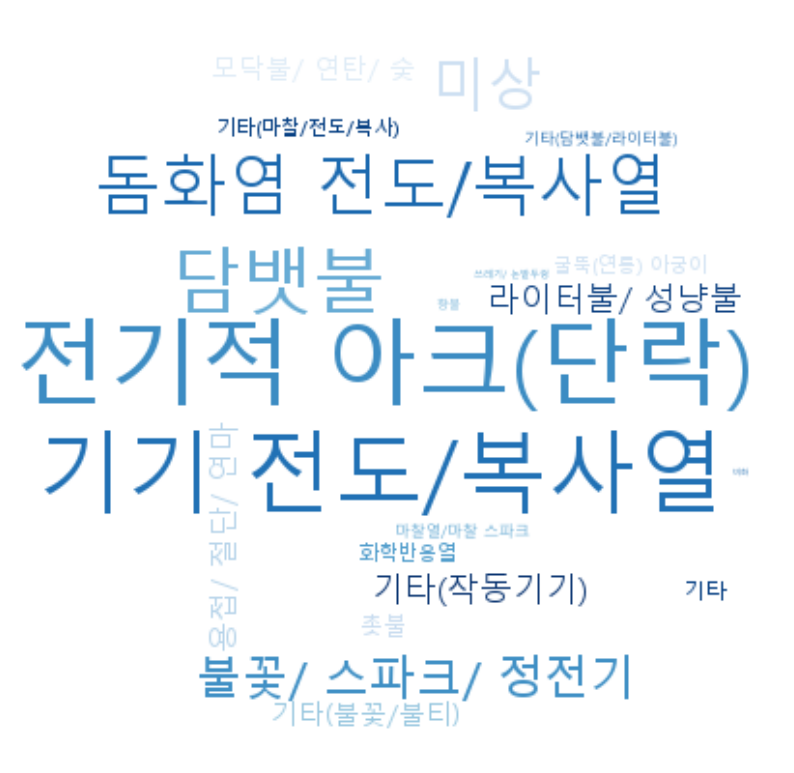

In [113]:
#사이즈 설정 및 출력
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
#plt.savefig('test.png')

원페이퍼 보고서에 사용될 수 있을까해서 해봤습니다.

In [114]:
df.drop(['발화열원소분류명'],axis=1, inplace=True)
#대분류명 있어서 소분류명은 제거

In [115]:
df.shape

(22040, 21)

## 범주형 변수 분포 확인

In [116]:
df['발화요인대분류명'].value_counts()
#df['ign_fctr_lclas_nm'].value_counts()

부주의         12484
전기적 요인       5876
미상           1796
기계적 요인       1029
방화            232
화학적 요인        186
방화의심          179
기타             99
가스누출(폭발)       78
제품결함           52
자연적인 요인        27
교통사고            2
Name: 발화요인대분류명, dtype: int64

In [117]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXSizeFourSym',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmex10',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmss10',
 'DejaVu Serif',
 'Arial Rounded MT Bold',
 'Yj SOSEL SemiBold',
 'Ami R',
 'Swis721 BT',
 'Tw Cen MT',
 'Segoe UI',
 'Lucida Bright',
 'Verdana',
 'HYGraphic-Medium',
 'Lucida Bright',
 'Yj BONMOKGAK Medium ',
 'Comic Sans MS',
 'MoeumT R',
 'Papyrus',
 'Haan YGodic 240',
 'ahn2006-M',
 'Comic Sans MS',
 'Californian FB',
 'MYingHei_18030_C-Medium',
 'Guli

In [118]:
plt.rcParams['font.family'] = 'Batang'

<AxesSubplot: xlabel='발화요인대분류명', ylabel='count'>

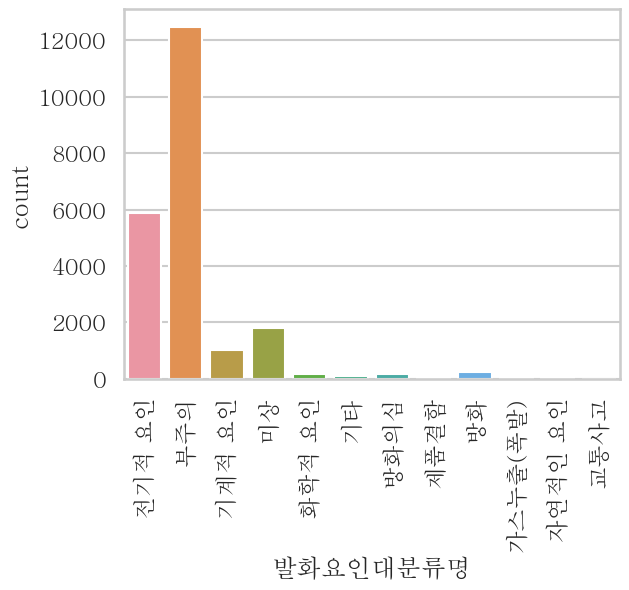

In [119]:
plt.xticks(rotation = 90)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=15)
sns.countplot(x='발화요인대분류명', data = df)

In [120]:
len(df) - (12484 + 5876 + 1796 + 1029)

855

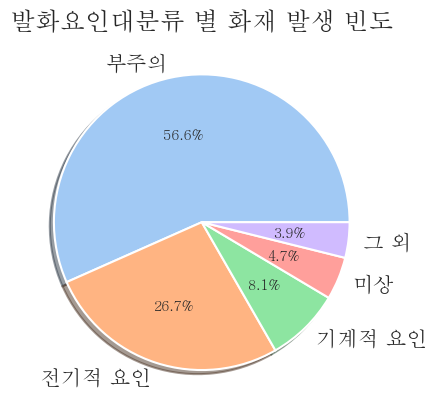

In [121]:
labels = ['부주의','전기적 요인','기계적 요인','미상','그 외']
values = [12484, 5876, 1796, 1029, 855]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=8)
plt.rc('xtick', labelsize=10) 
plt.title('발화요인대분류 별 화재 발생 빈도')
plt.show()

In [122]:
df['시설장소중분류명'].value_counts()
#df['fclty_place_mclas_nm'].value_counts()

공동주택      6911
단독주택      4666
음식점       3036
일반업무      1933
일상서비스     1190
판매시설       984
작업장        485
기타건축물      424
공장시설       259
숙박시설       233
의료시설       205
학교         177
종교시설       175
창고시설       171
오락시설       168
연구/학원      165
자동차시설      147
기타주택       139
노유자시설      101
위락시설        97
운동시설        88
공공기관        86
건강시설        74
역사/터미널      49
전시장         16
공연장         14
위생시설         9
청소년시설        8
지중시설         6
동식물시설        5
관람장          5
군사시설         4
발전시설         3
항공시설         3
문화재          3
항만시설         1
Name: 시설장소중분류명, dtype: int64

In [123]:
df['시설장소중분류명'].value_counts()[0:6]

공동주택     6911
단독주택     4666
음식점      3036
일반업무     1933
일상서비스    1190
판매시설      984
Name: 시설장소중분류명, dtype: int64

In [124]:
len(df) - df['시설장소중분류명'].value_counts()[0:6].sum()

3320

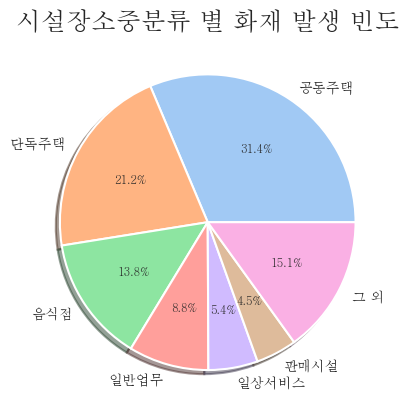

In [125]:
labels = ['공동주택','단독주택','음식점','일반업무','일상서비스','판매시설','그 외']
values = [6911,4666,3036,1933,1190,984,3320]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10)
plt.title('시설장소중분류 별 화재 발생 빈도')
plt.show()

In [126]:
df['방화관리대상여부'].value_counts()
#df['frmng_trgt_yn'].value_counts()


N    15066
Y     6974
Name: 방화관리대상여부, dtype: int64

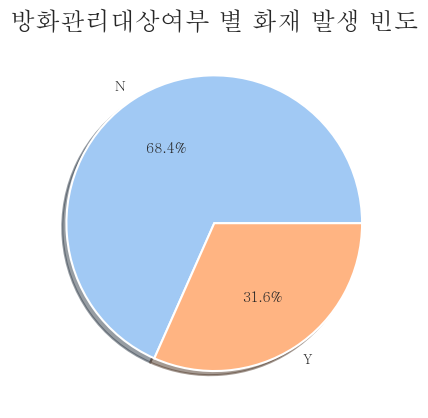

In [127]:
labels = ['N','Y']
values = [15066, 6974]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=20)
plt.title('방화관리대상여부 별 화재 발생 빈도')
plt.show()

<AxesSubplot: xlabel='방화관리대상여부', ylabel='사망인명피해수'>

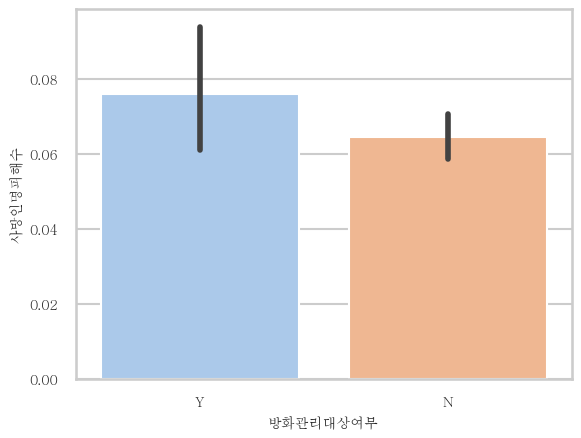

In [128]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10) 
sns.barplot( x='방화관리대상여부',y='사망인명피해수', data =df)
#방화관리대상일 때 사망인명피해수가 조금 더 높은 경향 있음. 근데 퍼센트이고, 0이 넘 많아서 딱히 의미있지는 않을듯

## 결측치 처리

In [129]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      4
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         3
시간단위풍속        34
시간단위풍향        34
시간단위습도         2
시간단위가시거리       0
재산피해액          0
평균 상대습도(%)     0
실효습도           0
주소             0
전기사용량(KWh)     0
가스사용량(KWh)     0
dtype: int64

In [130]:
df['현장소방지역대거리'].value_counts()

0.0    21896
1.0       95
2.0       24
3.0       15
4.0        5
6.0        1
Name: 현장소방지역대거리, dtype: int64

In [131]:
df[df['현장소방지역대거리'].isnull() == True]
# 왜 결측치가 있지?

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
428,0,1,20210131,4,3,3,NaN,전기적 요인,공동주택,N,...,1.7,70.0,71.0,2000,11,57.0,44.390298,강서구 가양동,15538.431843,20205.524521
1515,0,3,20200822,0,3,3,NaN,기계적 요인,학교,N,...,1.9,50.0,87.0,1787,86,87.4,68.241609,관악구 신림동,19728.240051,22588.126803
15441,0,3,20180719,19,5,2,NaN,부주의,음식점,N,...,2.3,290.0,58.0,1556,216,64.1,54.243258,송파구 석촌동,18330.922523,32722.230266
19263,0,3,20180723,13,6,2,NaN,부주의,공동주택,N,...,1.7,290.0,47.0,1887,78,53.8,45.493863,송파구 삼전동,19174.938592,22026.944740


In [132]:
df[df['주소']=='강서구 가양동']['현장소방지역대거리'].value_counts()

0.0    84
Name: 현장소방지역대거리, dtype: int64

In [133]:
df[df['주소']=='관악구 신림동']['현장소방지역대거리'].value_counts()

0.0    635
1.0      1
Name: 현장소방지역대거리, dtype: int64

In [134]:
df[df['주소']=='송파구 석촌동']['현장소방지역대거리'].value_counts()

0.0    70
Name: 현장소방지역대거리, dtype: int64

In [135]:
df[df['주소']=='송파구 삼전동']['현장소방지역대거리'].value_counts()

0.0    68
Name: 현장소방지역대거리, dtype: int64

인접 주소의 거리로 대체

In [136]:
df.loc[428,'현장소방지역대거리'] = 0
df.loc[1515,'현장소방지역대거리'] = 0
df.loc[15441,'현장소방지역대거리'] = 0
df.loc[19263,'현장소방지역대거리'] = 0

In [137]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         3
시간단위풍속        34
시간단위풍향        34
시간단위습도         2
시간단위가시거리       0
재산피해액          0
평균 상대습도(%)     0
실효습도           0
주소             0
전기사용량(KWh)     0
가스사용량(KWh)     0
dtype: int64

In [138]:
df.shape

(22040, 21)

In [139]:
df['시간단위기온'].value_counts()

 25.9    103
 24.6    102
 25.0    101
 25.6     99
 22.7     96
        ... 
 35.9      1
-17.2      1
-16.3      1
-13.6      1
 39.3      1
Name: 시간단위기온, Length: 547, dtype: int64

In [140]:
df[df['시간단위기온'].isnull() == True]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
4216,0,3,20200826,13,1,1,0.0,전기적 요인,공동주택,N,...,4.3,70.0,60.0,1800,20,68.3,59.972982,강서구 등촌동,19728.240051,22588.126803
7803,0,4,20171012,15,6,2,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,71.0,60.405507,금천구 독산동,19728.240051,22588.126803
18927,0,4,20171012,16,4,1,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,71.0,60.405507,구로구 가리봉동,11279.808478,15519.316192


In [141]:
df[df['시간단위풍속'].isnull() == True]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
300,0,2,20170424,19,1,2,0.0,전기적 요인,판매시설,N,...,NaN,NaN,31.0,2000,254,39.4,36.418812,마포구 동교동,15878.586913,19683.980739
457,0,2,20170425,0,1,1,0.0,부주의,판매시설,Y,...,NaN,NaN,55.0,1992,331,56.8,40.244055,강동구 성내동,19069.645904,16882.822424
682,0,4,20171206,9,2,2,0.0,부주의,단독주택,N,...,NaN,NaN,70.0,1324,111,72.6,50.137287,양천구 목동,19728.240051,22588.126803
750,0,3,20190929,11,3,1,0.0,부주의,음식점,Y,...,NaN,NaN,46.0,1710,37,60.6,49.742202,양천구 목동,19728.240051,22588.126803
2410,1,4,20171103,19,3,1,0.0,부주의,단독주택,N,...,NaN,NaN,50.0,1532,1412,66.0,54.551892,중랑구 면목동,18982.370424,17179.076394
3372,0,4,20191215,17,2,2,0.0,부주의,단독주택,N,...,NaN,NaN,41.0,1725,3713,52.5,45.009720,광진구 자양동,18330.922523,32722.230266
3546,0,4,20171205,20,2,2,0.0,미상,공공기관,Y,...,NaN,NaN,46.0,2000,95,40.1,44.068692,관악구 봉천동,18982.370424,17179.076394
3976,0,4,20171205,15,3,2,0.0,부주의,기타건축물,N,...,NaN,NaN,28.0,2000,498,40.1,44.068692,강남구 일원동,20556.121717,21964.263287
4074,0,4,20171014,13,10,1,0.0,부주의,일반업무,N,...,NaN,NaN,23.0,1995,44,42.8,47.459697,강서구 개화동,40115.142200,42286.679797
4460,0,4,20171205,12,3,1,0.0,부주의,공동주택,Y,...,NaN,NaN,25.0,1962,20,40.1,44.068692,강북구 수유동,11279.808478,15519.316192


In [142]:
df[df['시간단위풍향'].isnull() == True]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
300,0,2,20170424,19,1,2,0.0,전기적 요인,판매시설,N,...,NaN,NaN,31.0,2000,254,39.4,36.418812,마포구 동교동,15878.586913,19683.980739
457,0,2,20170425,0,1,1,0.0,부주의,판매시설,Y,...,NaN,NaN,55.0,1992,331,56.8,40.244055,강동구 성내동,19069.645904,16882.822424
682,0,4,20171206,9,2,2,0.0,부주의,단독주택,N,...,NaN,NaN,70.0,1324,111,72.6,50.137287,양천구 목동,19728.240051,22588.126803
750,0,3,20190929,11,3,1,0.0,부주의,음식점,Y,...,NaN,NaN,46.0,1710,37,60.6,49.742202,양천구 목동,19728.240051,22588.126803
2410,1,4,20171103,19,3,1,0.0,부주의,단독주택,N,...,NaN,NaN,50.0,1532,1412,66.0,54.551892,중랑구 면목동,18982.370424,17179.076394
3372,0,4,20191215,17,2,2,0.0,부주의,단독주택,N,...,NaN,NaN,41.0,1725,3713,52.5,45.009720,광진구 자양동,18330.922523,32722.230266
3546,0,4,20171205,20,2,2,0.0,미상,공공기관,Y,...,NaN,NaN,46.0,2000,95,40.1,44.068692,관악구 봉천동,18982.370424,17179.076394
3976,0,4,20171205,15,3,2,0.0,부주의,기타건축물,N,...,NaN,NaN,28.0,2000,498,40.1,44.068692,강남구 일원동,20556.121717,21964.263287
4074,0,4,20171014,13,10,1,0.0,부주의,일반업무,N,...,NaN,NaN,23.0,1995,44,42.8,47.459697,강서구 개화동,40115.142200,42286.679797
4460,0,4,20171205,12,3,1,0.0,부주의,공동주택,Y,...,NaN,NaN,25.0,1962,20,40.1,44.068692,강북구 수유동,11279.808478,15519.316192


In [143]:
df[df['시간단위습도'].isnull() == True]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
7803,0,4,20171012,15,6,2,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,71.0,60.405507,금천구 독산동,19728.240051,22588.126803
18927,0,4,20171012,16,4,1,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,71.0,60.405507,구로구 가리봉동,11279.808478,15519.316192


7803, 18927번째 행이 4가지 컬럼(기온, 풍향, 풍속, 습도) 에서 모두 결측치가 있어서 저 두개의 행은 제거 하기로 결정       

In [144]:
df = df.drop([7803, 18927], axis = 0)

In [145]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         1
시간단위풍속        32
시간단위풍향        32
시간단위습도         0
시간단위가시거리       0
재산피해액          0
평균 상대습도(%)     0
실효습도           0
주소             0
전기사용량(KWh)     0
가스사용량(KWh)     0
dtype: int64

In [146]:
df[df['시간단위기온'].isnull() == True]
#16554 번째 행의 시간단위 기온은 20200826의 평균으로 대체

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
4216,0,3,20200826,13,1,1,0.0,전기적 요인,공동주택,N,...,4.3,70.0,60.0,1800,20,68.3,59.972982,강서구 등촌동,19728.240051,22588.126803


In [147]:
df[df['화재발생일자'] == 20200826]['시간단위기온'].mean()

32.6

In [148]:
df.loc[4216,'시간단위기온'] = 32.6

In [149]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         0
시간단위풍속        32
시간단위풍향        32
시간단위습도         0
시간단위가시거리       0
재산피해액          0
평균 상대습도(%)     0
실효습도           0
주소             0
전기사용량(KWh)     0
가스사용량(KWh)     0
dtype: int64

In [150]:
df[df['시간단위풍속'].isnull() == True]['화재발생일자'].unique()

array([20170424, 20170425, 20171206, 20190929, 20171103, 20191215,
       20171205, 20171014, 20210107], dtype=int64)

In [151]:
df.dropna(subset=['시간단위풍속'],inplace = True)#제거

In [152]:
df.isnull().sum()

사망인명피해수       0
분기구분          0
화재발생일자        0
화재발생시         0
현장소방서거리       0
현장안전센터거리      0
현장소방지역대거리     0
발화요인대분류명      0
시설장소중분류명      0
방화관리대상여부      0
시간단위기온        0
시간단위풍속        0
시간단위풍향        0
시간단위습도        0
시간단위가시거리      0
재산피해액         0
평균 상대습도(%)    0
실효습도          0
주소            0
전기사용량(KWh)    0
가스사용량(KWh)    0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22006 entries, 0 to 22039
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     22006 non-null  int64  
 1   분기구분        22006 non-null  int64  
 2   화재발생일자      22006 non-null  int64  
 3   화재발생시       22006 non-null  int64  
 4   현장소방서거리     22006 non-null  int64  
 5   현장안전센터거리    22006 non-null  int64  
 6   현장소방지역대거리   22006 non-null  float64
 7   발화요인대분류명    22006 non-null  object 
 8   시설장소중분류명    22006 non-null  object 
 9   방화관리대상여부    22006 non-null  object 
 10  시간단위기온      22006 non-null  float64
 11  시간단위풍속      22006 non-null  float64
 12  시간단위풍향      22006 non-null  float64
 13  시간단위습도      22006 non-null  float64
 14  시간단위가시거리    22006 non-null  int64  
 15  재산피해액       22006 non-null  int64  
 16  평균 상대습도(%)  22006 non-null  float64
 17  실효습도        22006 non-null  float64
 18  주소          22006 non-null  object 
 19  전기사용량(KWh)  22006 non-nul

## numerical 변수 확인, 이상치 확인

In [154]:
df.describe()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,전기사용량(KWh),가스사용량(KWh)
count,22006.000000,22006.000000,2.200600e+04,22006.000000,22006.000000,22006.000000,22006.000000,22006.000000,22006.000000,22006.00000,22006.000000,22006.000000,2.200600e+04,22006.000000,22006.000000,22006.000000,22006.000000
mean,0.068345,2.499546,2.018924e+07,12.758884,3.263610,1.636735,0.009725,13.807675,2.237117,203.61356,56.736072,1518.470008,6.994168e+03,59.127570,49.378051,16899.591820,20723.938925
std,0.511233,1.115903,1.390813e+04,6.603080,1.813427,0.906841,0.141392,11.570933,1.182390,107.39815,20.685036,578.431747,4.865427e+05,15.579032,10.196203,7044.795988,11580.712586
min,0.000000,1.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,-17.900000,0.000000,0.00000,7.000000,27.000000,0.000000e+00,17.900000,23.940249,2338.921630,3565.980769
25%,0.000000,1.000000,2.018022e+07,8.000000,2.000000,1.000000,0.000000,4.500000,1.300000,90.00000,41.000000,1067.000000,3.100000e+01,47.600000,42.042174,11887.359896,16882.822424
50%,0.000000,3.000000,2.019040e+07,13.000000,3.000000,2.000000,0.000000,15.200000,2.100000,250.00000,55.000000,1833.000000,1.320000e+02,59.000000,49.120414,18330.922523,19664.817406
75%,0.000000,3.000000,2.020073e+07,18.000000,4.000000,2.000000,0.000000,23.600000,3.000000,290.00000,73.000000,2000.000000,6.892500e+02,69.600000,55.958100,19174.938592,22543.872489
max,33.000000,4.000000,2.021123e+07,23.000000,44.000000,20.000000,6.000000,39.400000,9.100000,360.00000,100.000000,5000.000000,7.161334e+07,98.100000,77.153859,233702.040000,696523.176471


현장소방서거리, 현장안전센터거리, 시간단위가시거리, 재산피해액, 전기사용량, 가스사용량 -> 이상치 의심

## 사망인명피해수

<AxesSubplot: xlabel='사망인명피해수', ylabel='count'>

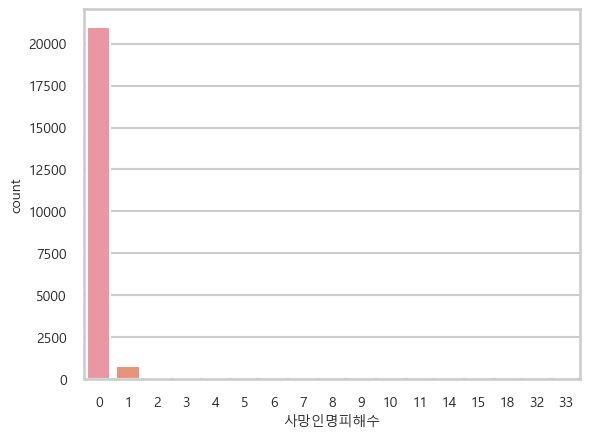

In [155]:
plt.rc('font', family='Malgun Gothic') #글꼴
sns.countplot(x='사망인명피해수', data = df)
#sns.countplot(x='dth_hnl_dmge_cnt', data = df)

<AxesSubplot: xlabel='사망인명피해수', ylabel='count'>

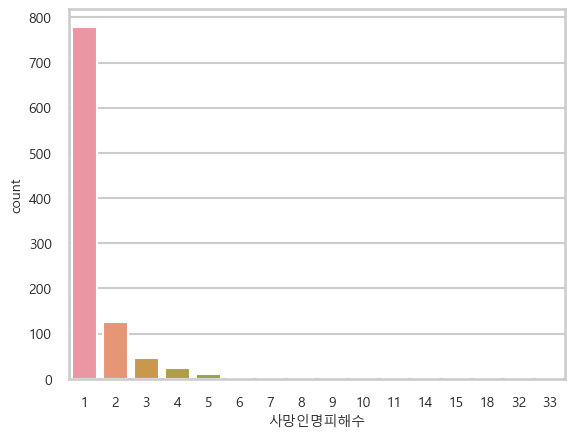

In [156]:
sns.countplot(x='사망인명피해수', data = df[df['사망인명피해수']>0])
#1명이상의 사상자 수에 대해서

In [157]:
df[df['사망인명피해수']>0]['사망인명피해수'].value_counts()

1     779
2     125
3      47
4      23
5      11
6       2
8       2
10      2
7       1
15      1
33      1
9       1
11      1
32      1
14      1
18      1
Name: 사망인명피해수, dtype: int64

## 분기구분

<AxesSubplot: xlabel='분기구분', ylabel='사망인명피해수'>

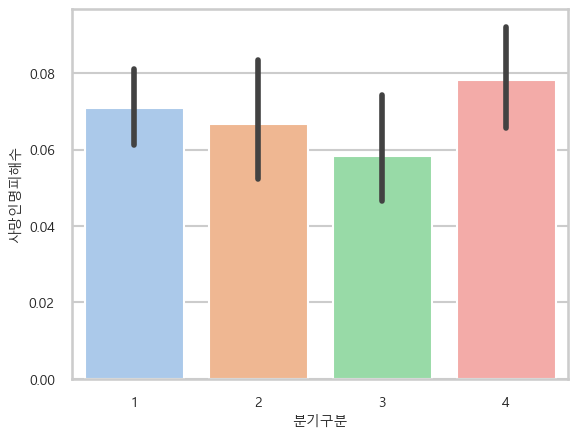

In [158]:
sns.barplot( x='분기구분',y='사망인명피해수', data =df)

<AxesSubplot: xlabel='분기구분', ylabel='count'>

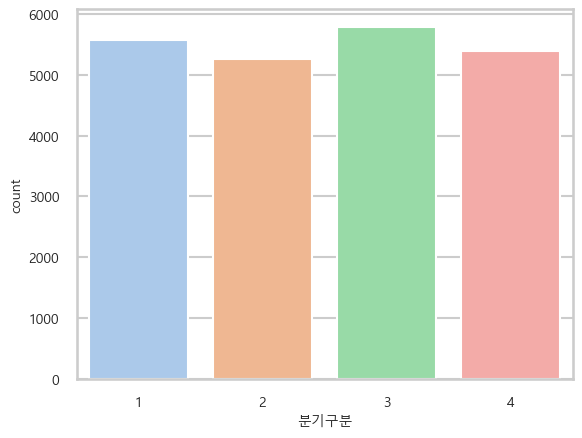

In [159]:
sns.countplot(x='분기구분', data = df)
#분기별 화재 발생 빈도 

## 화재발생시

<AxesSubplot: xlabel='화재발생시', ylabel='사망인명피해수'>

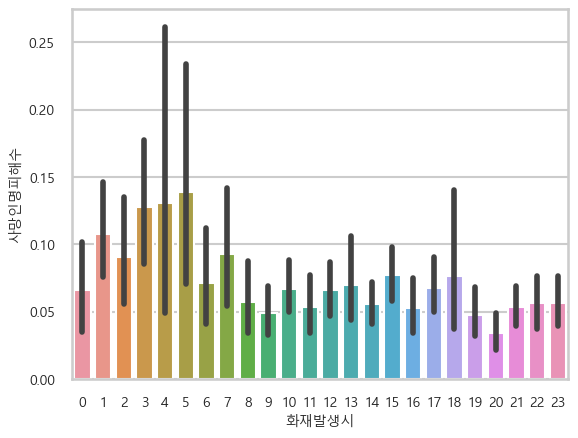

In [160]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot( x='화재발생시',y='사망인명피해수', data =df)
#주로 새벽에 사망인명피해수가 높은 걸 볼 수 있음. 새벽이라 주위 신고나 사람들의 대처가 늦었던 것으로 예상..

<AxesSubplot: xlabel='화재발생시', ylabel='count'>

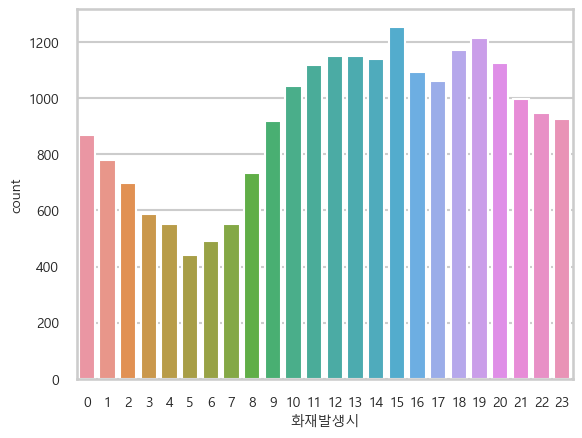

In [161]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.countplot(x='화재발생시', data = df)
#몇시에 가장 화재가 많이 발생했는가?
#사망인명피해수는 새벽타임이 가장 높았지만 빈도로 보면 새벽에 가장 화재가 조금 났음
#새벽에는 대형화재가 많이 발생할 것으로 짐작 가능

# 기상 요인
### 시간단위기온, 시간단위풍속, 시간단위풍향, 시간단위습도, 평균 상대습도(%), 실효습도

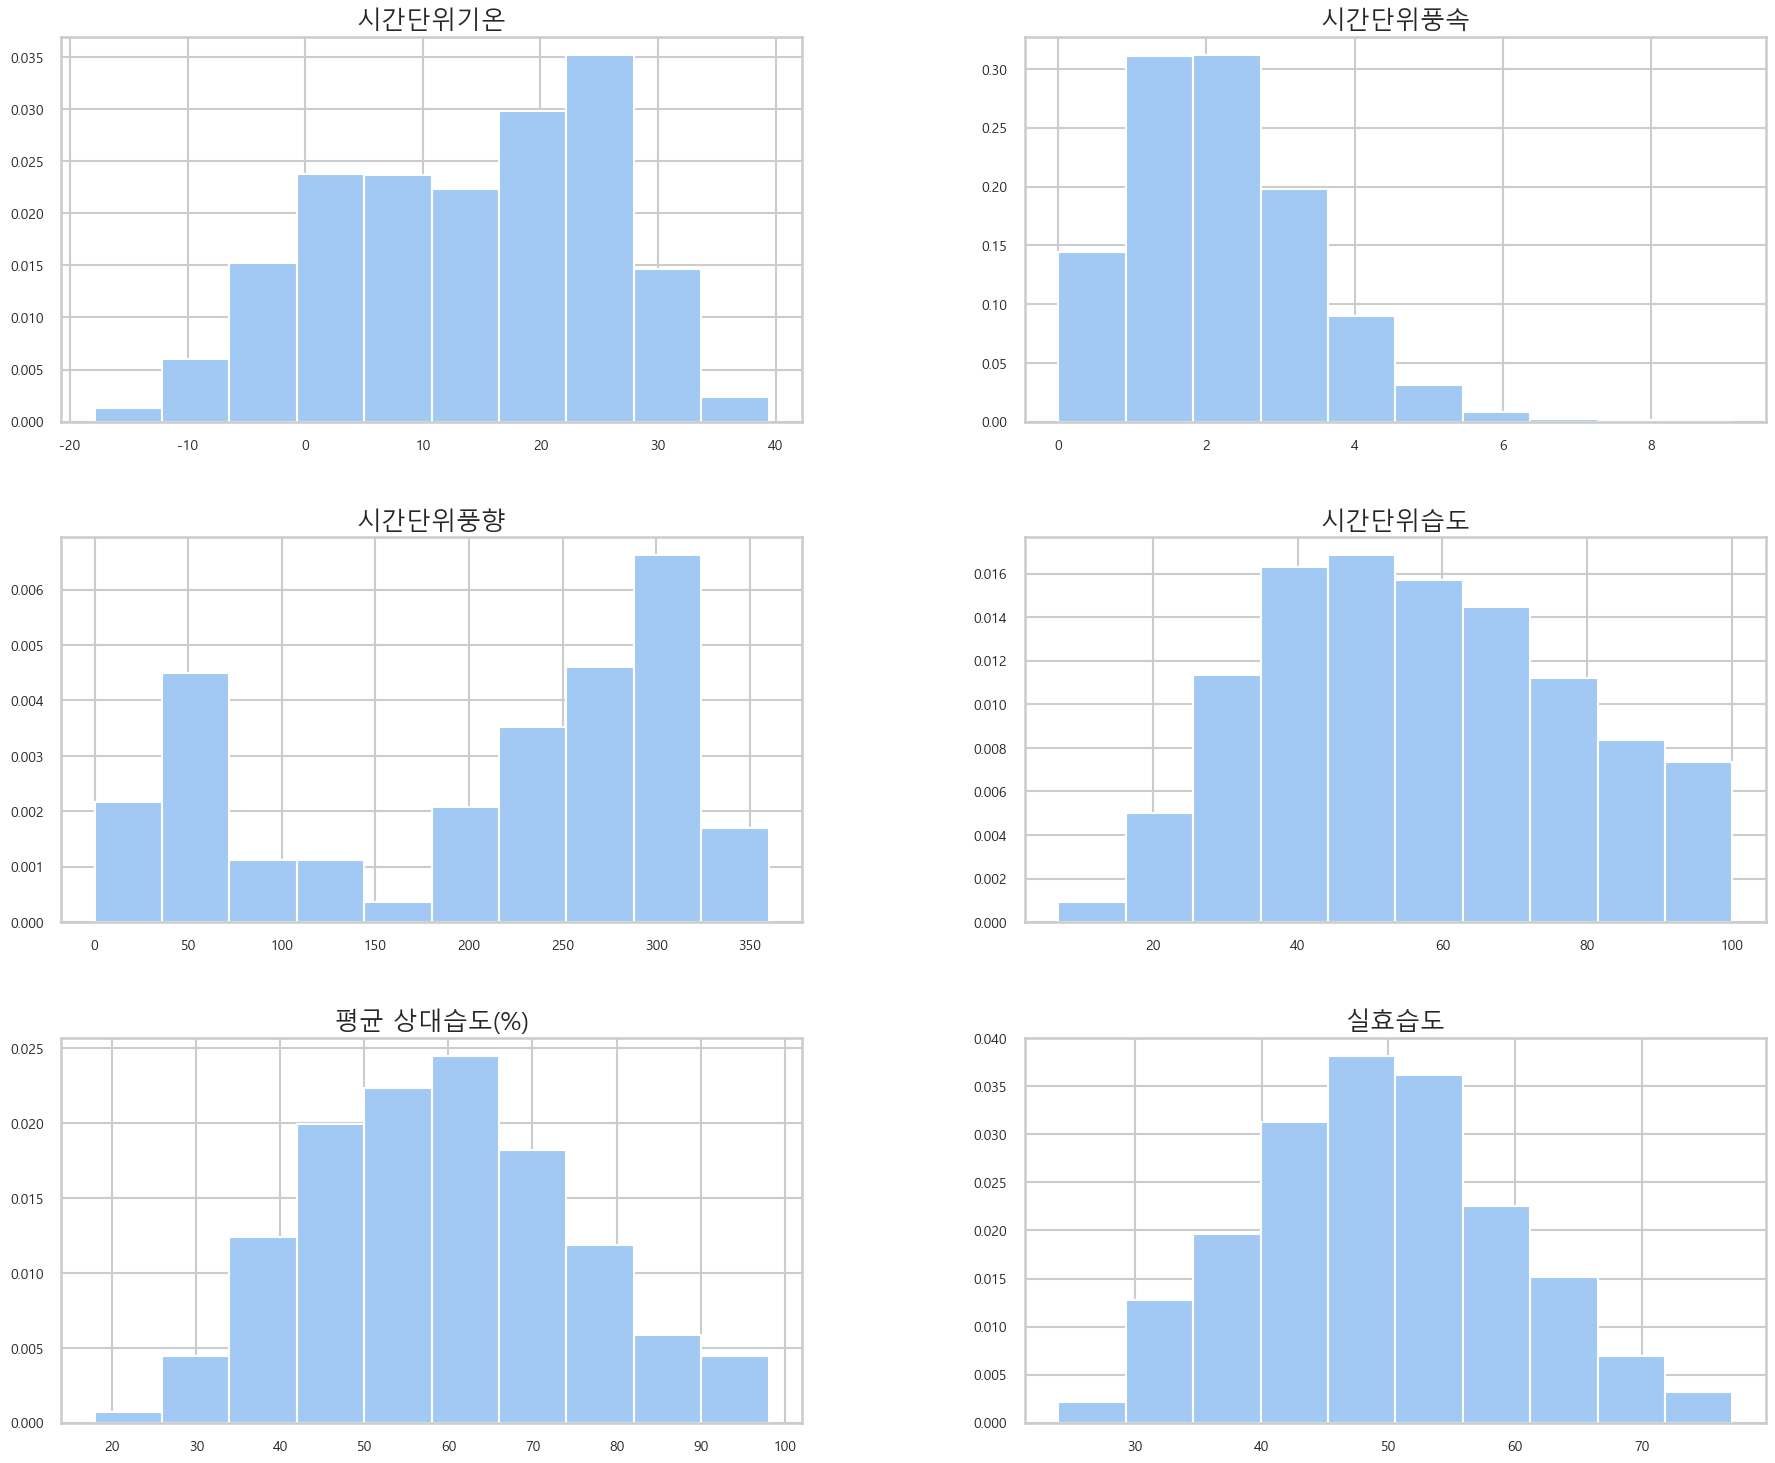

In [162]:
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
weather_df = df[['시간단위기온','시간단위풍속','시간단위풍향','시간단위습도','평균 상대습도(%)','실효습도']]
weather_df.hist(figsize=(22,18), density=True)
plt.show()

## 전기사용량, 가스사용량

<AxesSubplot: xlabel='전기사용량(KWh)', ylabel='Density'>

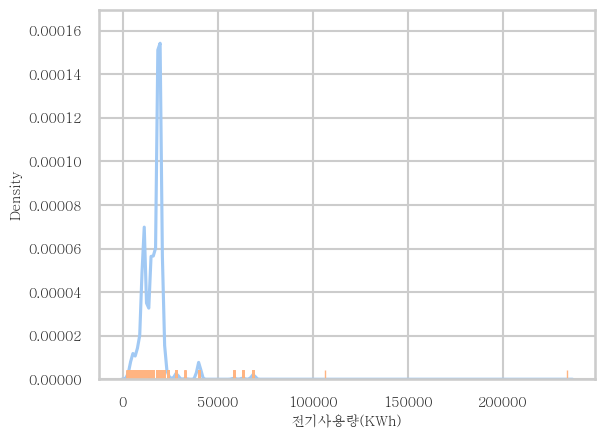

In [163]:
plt.rcParams['font.family'] = 'Batang'
sns.kdeplot(x=df['전기사용량(KWh)'])
sns.rugplot(x=df["전기사용량(KWh)"])

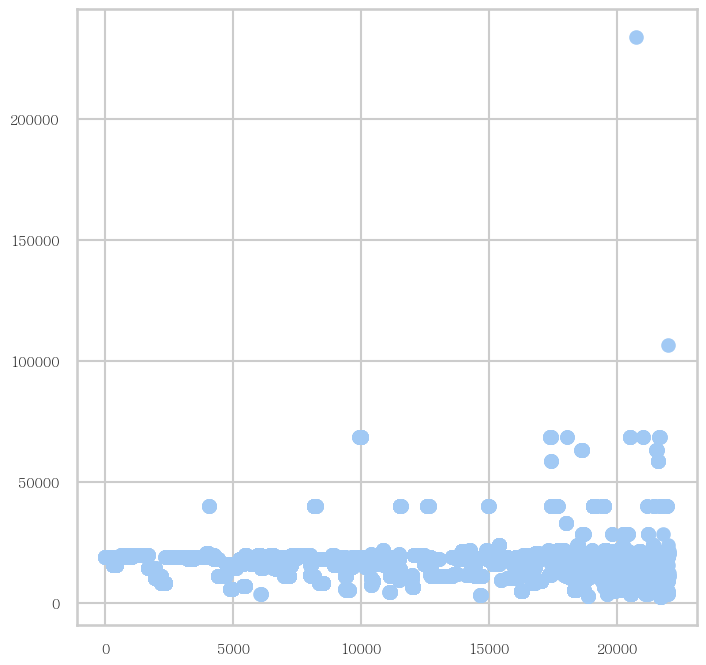

In [164]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(df)), df['전기사용량(KWh)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de22e6ff70>,
 'caps': [<matplotlib.lines.Line2D at 0x1de22ea04f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de22e6fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de22ea0a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de22ea0cd0>],
 'means': []}

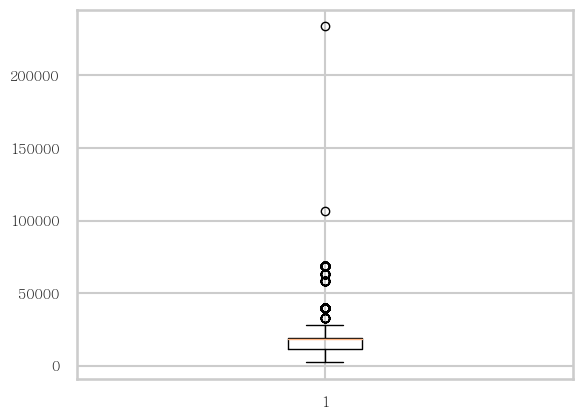

In [165]:
plt.boxplot(df['전기사용량(KWh)'])

In [166]:
Q1 = df['전기사용량(KWh)'].quantile(.25)
Q3 = df['전기사용량(KWh)'].quantile(.75)
IQR = Q3 - Q1
max_standard = Q3 + (1.5 * IQR)
len(df[df['전기사용량(KWh)']>max_standard])

588

In [168]:
max_standard

30106.30663652299

In [169]:
df[df['전기사용량(KWh)']>max_standard]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
4072,0,1,20170103,11,6,4,0.0,미상,기타건축물,N,...,1.2,200.0,53.0,628,3450,61.8,57.376250,강서구 개화동,40115.142200,42286.679797
4073,0,3,20170921,1,7,1,0.0,부주의,단독주택,N,...,1.4,50.0,71.0,2000,4,57.3,49.243959,강서구 개화동,40115.142200,42286.679797
4075,0,2,20180614,9,7,1,0.0,부주의,단독주택,N,...,0.6,90.0,96.0,273,20,74.9,56.778267,강서구 개화동,40115.142200,42286.679797
4076,0,4,20181217,13,10,1,0.0,전기적 요인,단독주택,N,...,2.0,270.0,35.0,717,49,60.1,47.000592,강서구 개화동,40115.142200,42286.679797
4077,0,4,20181230,4,11,2,0.0,전기적 요인,작업장,N,...,0.6,320.0,50.0,1961,1960,35.9,27.561894,강서구 개화동,40115.142200,42286.679797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21966,0,3,20190820,23,3,1,0.0,전기적 요인,숙박시설,N,...,1.0,160.0,56.0,1960,962,56.3,51.909285,중구 수표동,40115.142200,42286.679797
21967,0,1,20200120,12,3,1,0.0,부주의,음식점,N,...,3.7,250.0,29.0,1439,90,46.8,41.913300,중구 수표동,40115.142200,42286.679797
21968,0,3,20210816,2,3,2,0.0,전기적 요인,판매시설,N,...,1.8,70.0,68.0,2000,440,61.1,52.316673,중구 수표동,40115.142200,42286.679797
21969,0,3,20210816,2,3,1,0.0,전기적 요인,일반업무,N,...,1.8,70.0,68.0,2000,301,61.1,52.316673,중구 수표동,40115.142200,42286.679797


In [181]:
df['전기사용량(KWh)'].nunique()

86

In [182]:
df['주소'].nunique()

446

In [172]:
mean = np.mean(df['전기사용량(KWh)'])

std = np.std(df['전기사용량(KWh)'])
threshold = 3

outlier = [] 

for i in df['전기사용량(KWh)']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

#print('데이터셋 내의 이상값은', outlier)
len(outlier)

573

In [176]:
outlier.sort()

In [177]:
outlier

[40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,
 40115.14220003145,


In [74]:
df[df['전기사용량(KWh)']>200000]
#전기사용량이 넘 높은 data 하나 있음

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
20759,0,2,20170530,10,2,3,0.0,부주의,종교시설,N,...,1.9,270.0,41.0,1362,110,43.5,41.199135,종로구 홍파동,233702.04,696523.176471


<AxesSubplot: xlabel='전기사용량(KWh)', ylabel='Density'>

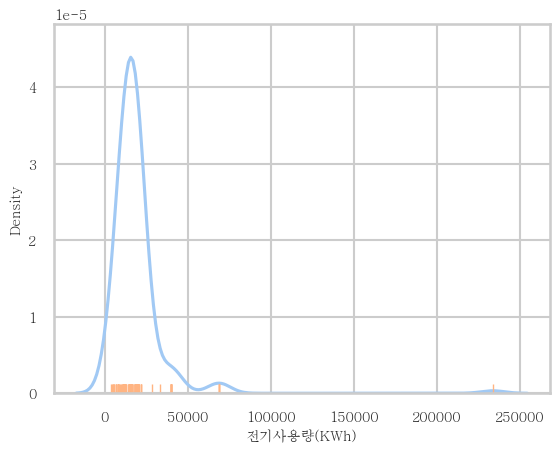

In [75]:
rel_df = df[df['시설장소중분류명']=='종교시설']
sns.kdeplot(x=rel_df['전기사용량(KWh)'])
sns.rugplot(x=rel_df["전기사용량(KWh)"])
#종교시설은 다 높나?

<AxesSubplot: >

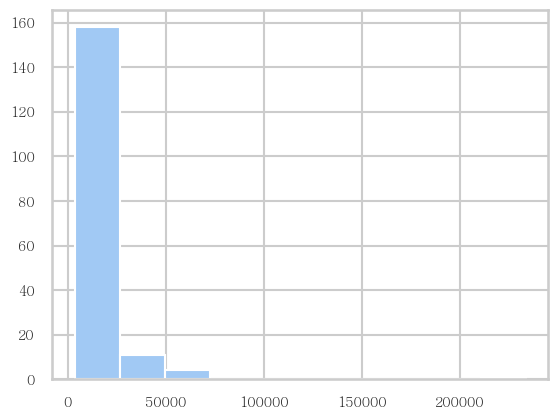

In [76]:
rel_df['전기사용량(KWh)'].hist()
#종교시설이라고 다 높은 건 아닌듯.. 쟤는 왤케 높지?

In [77]:
df[df['주소']== '종로구 홍파동']

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
20759,0,2,20170530,10,2,3,0.0,부주의,종교시설,N,...,1.9,270.0,41.0,1362,110,43.5,41.199135,종로구 홍파동,233702.04,696523.176471


In [78]:
df = df.drop(20759, axis = 0)
#제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1de10748700>,
 'caps': [<matplotlib.lines.Line2D at 0x1de107497e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de107484c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de1074a2f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de1074a740>],
 'means': []}

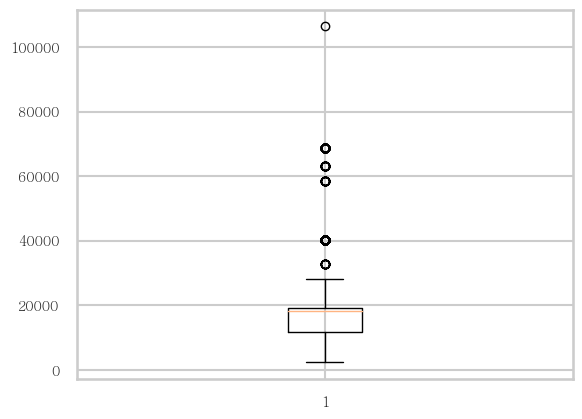

In [79]:
plt.boxplot(df['전기사용량(KWh)'])

In [80]:
df[df['전기사용량(KWh)']>100000]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
22028,0,4,20191205,7,2,2,0.0,부주의,일반업무,N,...,2.2,270.0,36.0,2000,163,31.9,37.975482,종로구 평동,106382.762887,306062.181818


<AxesSubplot: >

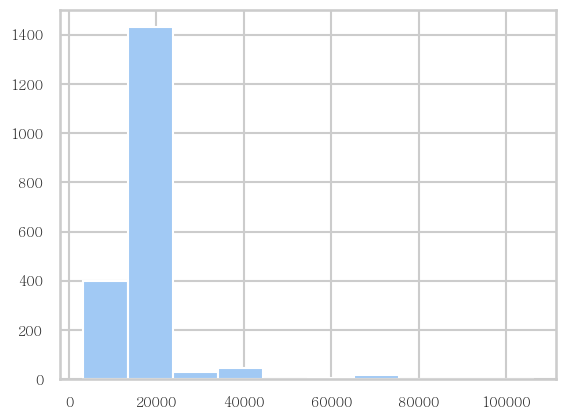

In [81]:
n_df = df[df['시설장소중분류명']=='일반업무']
n_df['전기사용량(KWh)'].hist()

In [82]:
df[df['주소']== '종로구 평동']

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
22028,0,4,20191205,7,2,2,0.0,부주의,일반업무,N,...,2.2,270.0,36.0,2000,163,31.9,37.975482,종로구 평동,106382.762887,306062.181818


In [85]:
df[df['전기사용량(KWh)']>50000]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
9946,0,1,20170109,12,10,1,0.0,부주의,공동주택,Y,...,3.7,270.0,57.0,527,90,60.8,50.461119,마포구 상암동,68741.521640,124063.705297
9947,0,1,20170114,19,5,2,0.0,부주의,공동주택,N,...,3.0,320.0,29.0,2000,94,33.3,33.273813,마포구 상암동,68741.521640,124063.705297
9948,0,1,20170203,4,7,1,0.0,부주의,공동주택,N,...,0.8,320.0,77.0,1063,422,65.4,46.303062,마포구 상암동,68741.521640,124063.705297
9949,1,1,20170225,2,9,1,0.0,방화의심,일반업무,Y,...,1.3,270.0,83.0,608,8460,63.6,48.101433,마포구 상암동,68741.521640,124063.705297
9950,0,1,20170309,21,10,1,0.0,부주의,공동주택,Y,...,3.6,270.0,39.0,2000,51,47.3,39.735618,마포구 상암동,68741.521640,124063.705297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,0,1,20180227,9,2,2,0.0,부주의,공동주택,Y,...,1.0,20.0,51.0,866,486,48.8,40.584093,용산구 용산동5가,68741.521640,124063.705297
21679,0,3,20180720,18,3,3,0.0,미상,단독주택,N,...,2.0,290.0,42.0,1969,3040,62.6,53.240979,용산구 용산동5가,68741.521640,124063.705297
21680,0,4,20201007,13,2,2,0.0,부주의,공동주택,Y,...,3.0,50.0,35.0,1700,8,48.9,46.753065,용산구 용산동5가,68741.521640,124063.705297
21681,0,4,20201103,15,4,4,0.0,부주의,공동주택,Y,...,4.4,270.0,35.0,2000,11,47.5,48.180057,용산구 용산동5가,68741.521640,124063.705297


<AxesSubplot: xlabel='가스사용량(KWh)', ylabel='Density'>

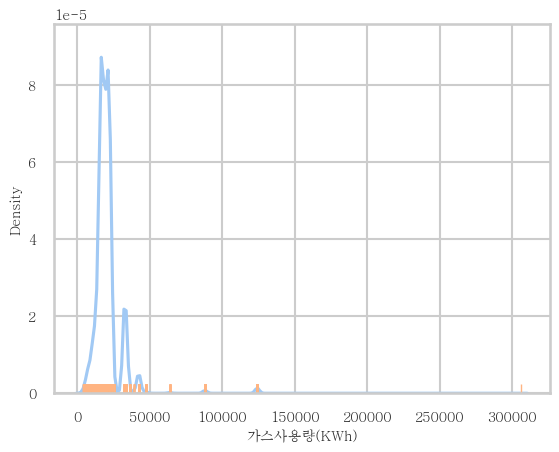

In [257]:
sns.kdeplot(x=df['가스사용량(KWh)'])
sns.rugplot(x=df["가스사용량(KWh)"])

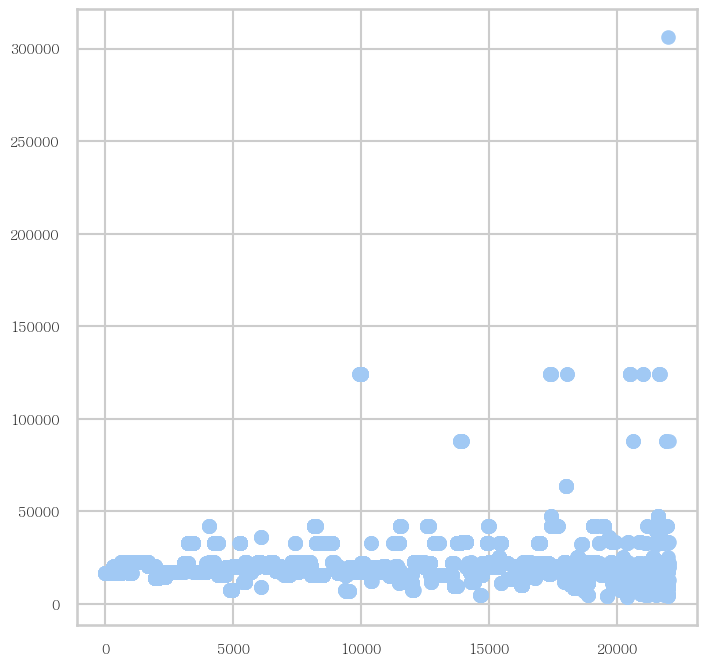

In [258]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(df)), df['가스사용량(KWh)'])

<AxesSubplot: ylabel='가스사용량(KWh)'>

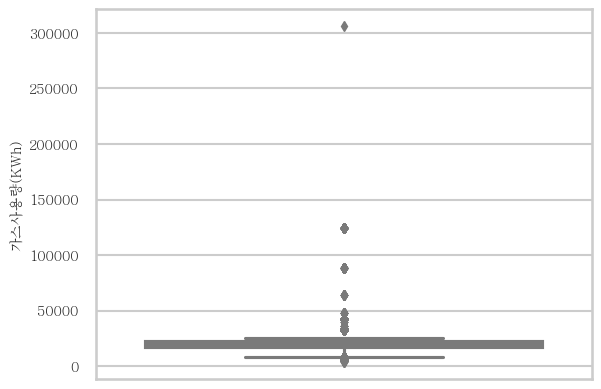

In [264]:
sns.boxplot(y=df['가스사용량(KWh)'])

In [262]:
df[df['가스사용량(KWh)']>300000]
#제거

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
22028,0,4,20191205,7,2,2,0.0,부주의,일반업무,N,...,2.2,270.0,36.0,2000,163,31.9,37.975482,종로구 평동,106382.762887,306062.181818


In [265]:
df = df.drop(22028, axis = 0)

<AxesSubplot: ylabel='가스사용량(KWh)'>

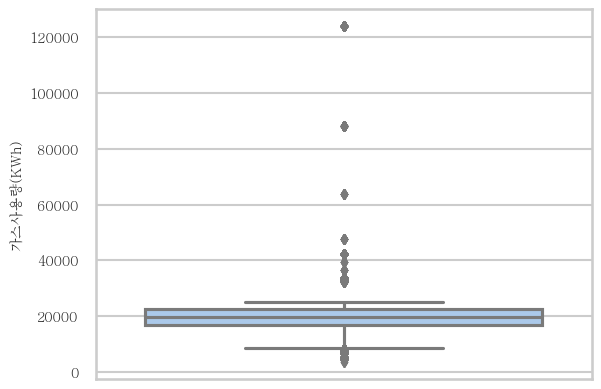

In [267]:
sns.boxplot(y=df['가스사용량(KWh)'])

## 현장소방서거리, 현장안전센터거리, 가시거리

<AxesSubplot: ylabel='현장소방서거리'>

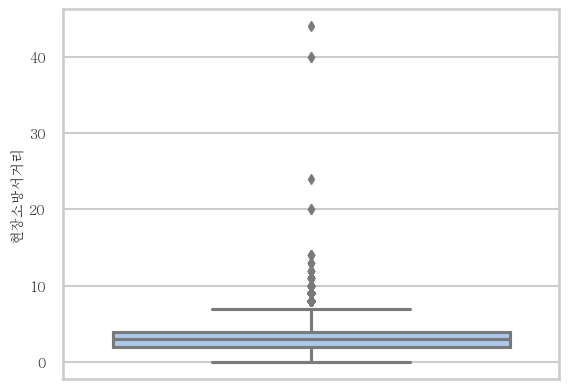

In [387]:
sns.boxplot(y=df['현장소방서거리'])

In [388]:
q1_index = int(len(df['현장소방서거리']) * 0.25)
q1 = df['현장소방서거리'].index.to_numpy()[q1_index - 1]
q3_index = int(len(df['현장소방서거리']) * 0.75)
q3 = df['현장소방서거리'].index.to_numpy()[q3_index - 1]
IQR = q3 - q1
max_standard = q3 + (1.5 * IQR)
len(df[df['현장소방서거리']>max_standard])

0

In [386]:
q3

16527

In [366]:
df['현장소방서거리'].value_counts()

3     5500
2     4999
4     4060
1     2849
5     2185
6     1075
7      545
8      331
0      229
9      136
10      49
11      25
12       8
13       5
14       4
40       2
20       2
44       1
24       1
Name: 현장소방서거리, dtype: int64

In [269]:
df[df['현장소방서거리'] == 40]['주소']

4002    강남구 일원동
9230    서초구 서초동
Name: 주소, dtype: object

In [270]:
df[df['현장소방서거리'] == 44]['주소']
#현장소방서거리가 44는 너무 먼 것 같아서 위치를 확인

6763    마포구 성산동
Name: 주소, dtype: object

In [271]:
df[df['주소']=='강남구 일원동']['현장소방서거리'].value_counts()

4     37
5      8
6      4
2      3
3      2
40     1
8      1
7      1
Name: 현장소방서거리, dtype: int64

In [272]:
df[df['주소']=='서초구 서초동']['현장소방서거리'].value_counts()

4     139
3      64
5      40
6      23
7       8
2       4
40      1
8       1
Name: 현장소방서거리, dtype: int64

In [273]:
df[df['주소']=='마포구 성산동']['현장소방서거리'].value_counts()

3     28
4     27
6     27
5      9
7      6
8      2
2      1
44     1
Name: 현장소방서거리, dtype: int64

In [93]:
#이상치 제거
df = df.drop([4002, 9230, 6763], axis = 0)

In [104]:
df['현장안전센터거리'].value_counts()

1     10036
2      7970
3      2372
0       963
4       496
5       100
6        35
7        14
8         4
9         3
10        2
20        1
16        1
Name: 현장안전센터거리, dtype: int64

In [105]:
df[df['현장안전센터거리'] == 20]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
4275,0,3,20170727,20,2,20,0.0,전기적 요인,위락시설,Y,...,2.2,50.0,65.0,1858,400,62.5,54.764055,강남구 삼성동,18330.922523,32722.230266


In [275]:
df[df['현장안전센터거리'] == 16]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
10788,1,1,20200104,12,2,16,0.0,부주의,단독주택,N,...,2.8,340.0,51.0,897,1436,50.8,46.260339,양천구 신정동,18982.370424,17179.076394


In [108]:
df[df['주소'] == '강남구 삼성동']['현장안전센터거리'].value_counts()

2     79
1     57
3     23
0      7
4      1
20     1
Name: 현장안전센터거리, dtype: int64

In [276]:
len(df[df['시간단위가시거리'] == 2000])

7501

가시거리 : 날씨 및 항공 관련 용어로, 눈으로 볼 수 있는 가장 먼 거리

max가 2000이고 전체 data중 2000인 data가 매우 많음

그냥 2000을 최대로 하고 측정한듯

## 재산피해액

<AxesSubplot: xlabel='재산피해액', ylabel='Density'>

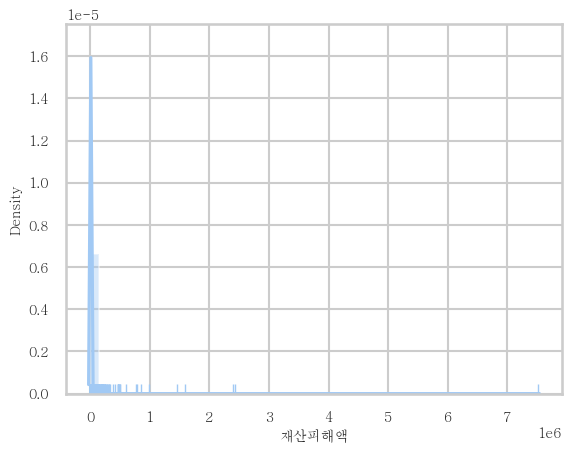

In [95]:
sns.distplot(df[df['재산피해액'] != 71613336]['재산피해액'], kde=True, rug=True)

<AxesSubplot: >

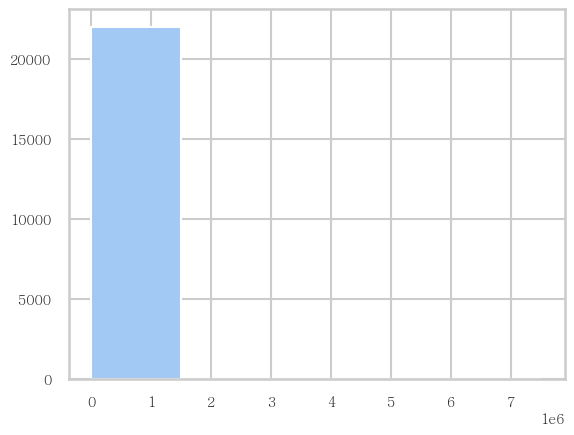

In [94]:
df[df['재산피해액'] != 71613336]['재산피해액'].hist(bins=)

In [87]:
mean = np.mean(df['재산피해액'])

std = np.std(df['재산피해액'])
threshold = 3

outlier = [] 

for i in df['재산피해액']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

print('데이터셋 내의 이상값은', outlier)

데이터셋 내의 이상값은 [2397753, 2432471, 71613336, 7512359, 1586332]


## 판다스 프로파일링

In [95]:
import ydata_profiling
pr = df.profile_report()
pr.to_file('./pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 상관분석

In [96]:
plt.rc('font', family='Malgun Gothic')

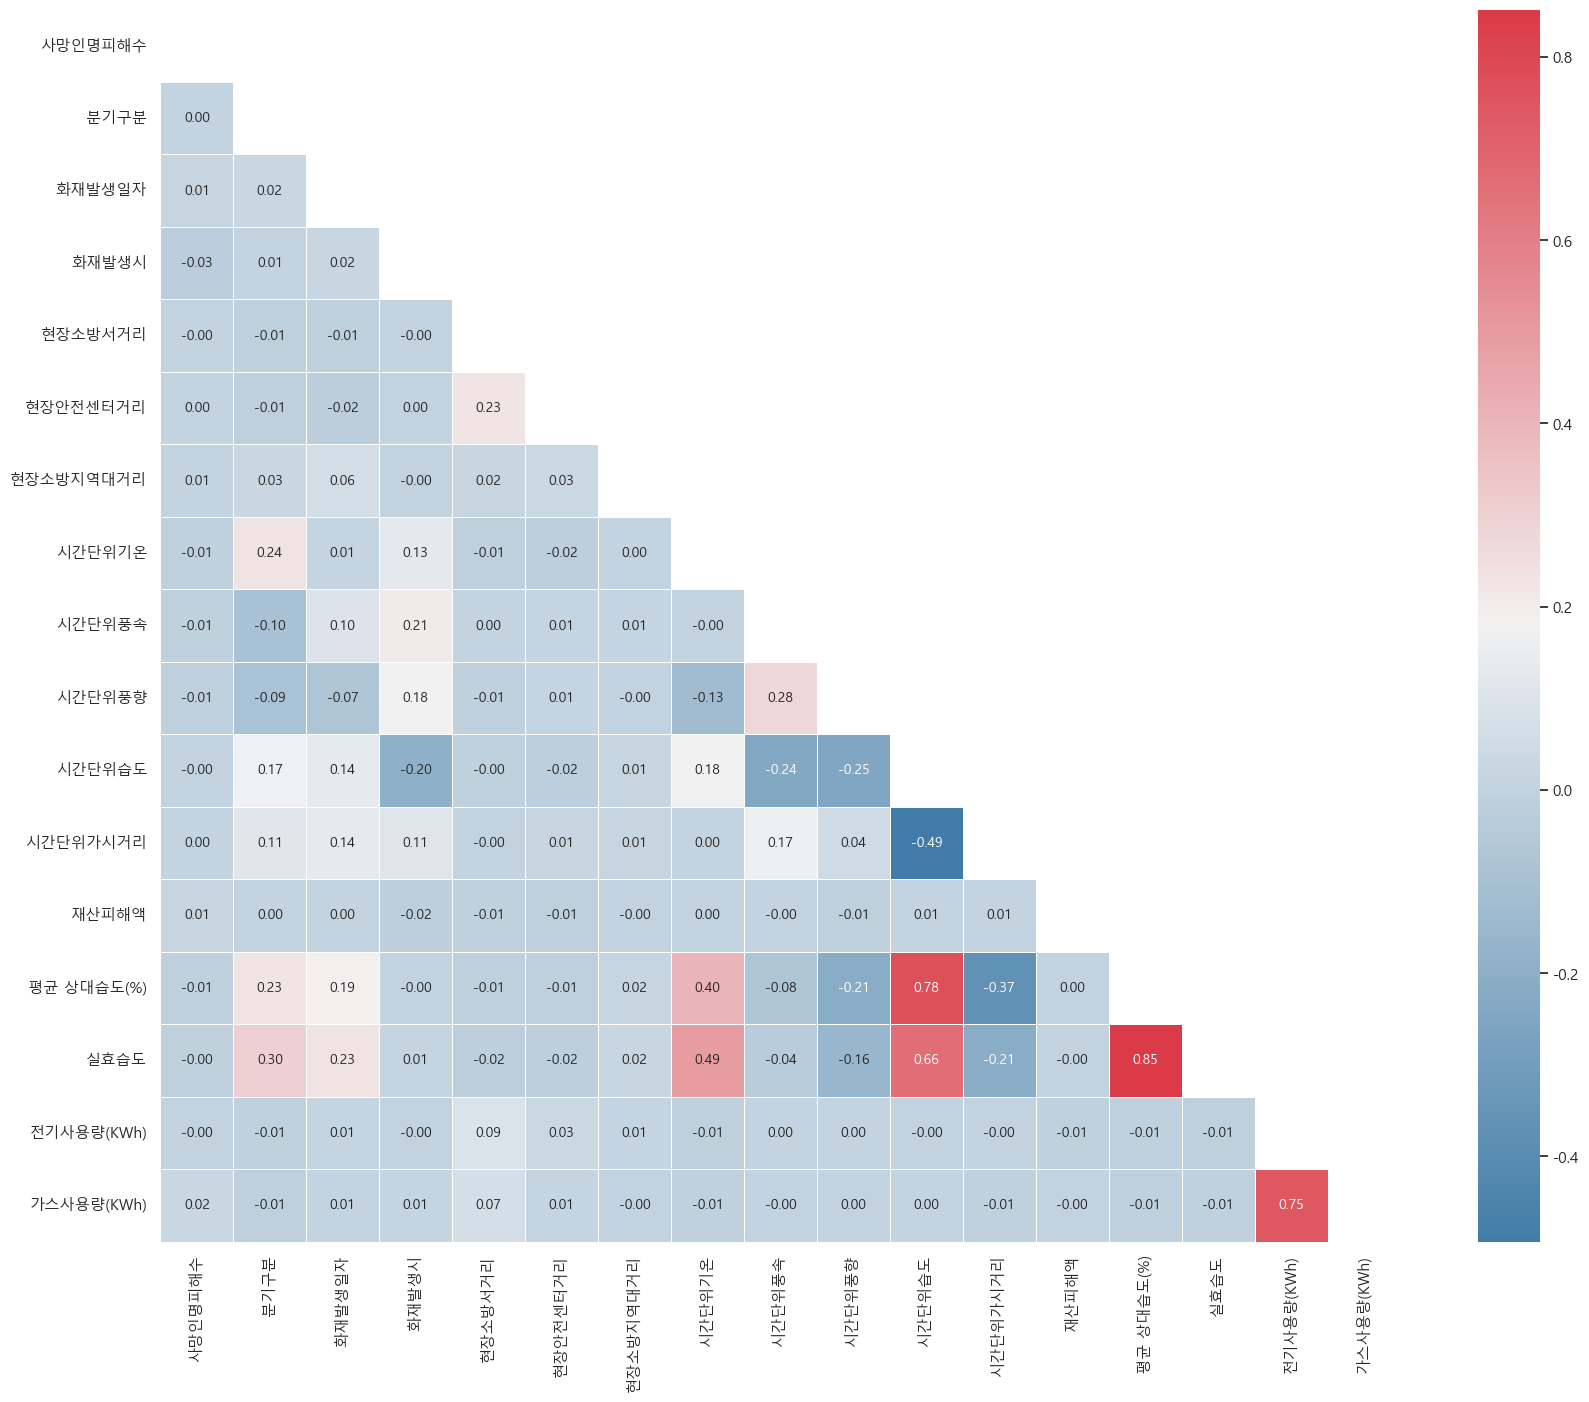

In [97]:
cmap = sns.diverging_palette(240,10,n=9, as_cmap=True)

plt.figure(figsize=(20,16))
mask = np.zeros_like(df.corr(numeric_only=True), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap=cmap, mask=mask,linewidths=.5,fmt='.2f', annot_kws ={'size' :10})

plt.show()

In [98]:
cor_matrix = df.corr(numeric_only = True).abs()
cor_matrix

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,전기사용량(KWh),가스사용량(KWh)
사망인명피해수,1.000000,0.002618,0.013652,0.028481,0.000838,0.003789,0.005261,0.009550,0.008838,0.010285,0.000215,0.004026,0.011368,0.005661,0.004591,0.004125,0.022518
분기구분,0.002618,1.000000,0.023704,0.005025,0.010016,0.011368,0.025961,0.236377,0.099000,0.089168,0.172465,0.112728,0.003392,0.229555,0.303315,0.006258,0.012344
화재발생일자,0.013652,0.023704,1.000000,0.020635,0.013963,0.021553,0.058962,0.007732,0.096703,0.073136,0.136452,0.136617,0.001523,0.186609,0.233832,0.008176,0.005203
화재발생시,0.028481,0.005025,0.020635,1.000000,0.002697,0.000638,0.003051,0.128120,0.206828,0.175136,0.196865,0.108778,0.015353,0.000931,0.011086,0.003616,0.006353
현장소방서거리,0.000838,0.010016,0.013963,0.002697,1.000000,0.228971,0.016038,0.014612,0.003912,0.009123,0.004923,0.004158,0.007206,0.011492,0.018169,0.092140,0.065880
현장안전센터거리,0.003789,0.011368,0.021553,0.000638,0.228971,1.000000,0.031473,0.015333,0.010806,0.011042,0.019668,0.011565,0.011698,0.013222,0.016513,0.028940,0.009818
현장소방지역대거리,0.005261,0.025961,0.058962,0.003051,0.016038,0.031473,1.000000,0.002420,0.009467,0.000578,0.014788,0.013520,0.000705,0.015690,0.021258,0.009064,0.001070
시간단위기온,0.009550,0.236377,0.007732,0.128120,0.014612,0.015333,0.002420,1.000000,0.004108,0.130031,0.179402,0.001043,0.000745,0.401996,0.493064,0.012613,0.008651
시간단위풍속,0.008838,0.099000,0.096703,0.206828,0.003912,0.010806,0.009467,0.004108,1.000000,0.279578,0.239369,0.165411,0.004292,0.075928,0.035303,0.002188,0.002914
시간단위풍향,0.010285,0.089168,0.073136,0.175136,0.009123,0.011042,0.000578,0.130031,0.279578,1.000000,0.249138,0.044576,0.010394,0.211284,0.158527,0.002146,0.000667


In [99]:
cor_matrix['사망인명피해수']

사망인명피해수       1.000000
분기구분          0.002618
화재발생일자        0.013652
화재발생시         0.028481
현장소방서거리       0.000838
현장안전센터거리      0.003789
현장소방지역대거리     0.005261
시간단위기온        0.009550
시간단위풍속        0.008838
시간단위풍향        0.010285
시간단위습도        0.000215
시간단위가시거리      0.004026
재산피해액         0.011368
평균 상대습도(%)    0.005661
실효습도          0.004591
전기사용량(KWh)    0.004125
가스사용량(KWh)    0.022518
Name: 사망인명피해수, dtype: float64

In [100]:
df_select = df[cor_matrix[cor_matrix['사망인명피해수'] >= 0.01]["사망인명피해수"].index]
df_select

,사망인명피해수,화재발생일자,화재발생시,시간단위풍향,재산피해액,가스사용량(KWh)
0,0,20170101,0,20.0,13391,16882.822424
1,0,20170107,15,270.0,35,16882.822424
2,0,20170115,20,250.0,308,16882.822424
3,0,20170120,10,270.0,184,16882.822424
4,0,20170127,3,270.0,877,16882.822424
...,...,...,...,...,...,...
22035,0,20200228,22,90.0,58,19969.134370
22036,0,20211229,12,50.0,18,19969.134370
22037,0,20210412,22,50.0,14,88001.757152
22038,0,20210715,13,140.0,38353,12999.999372


사망인명피해수와의 상관계수를 0.01 기준으로 보아도 전기는 포함이 안됨..

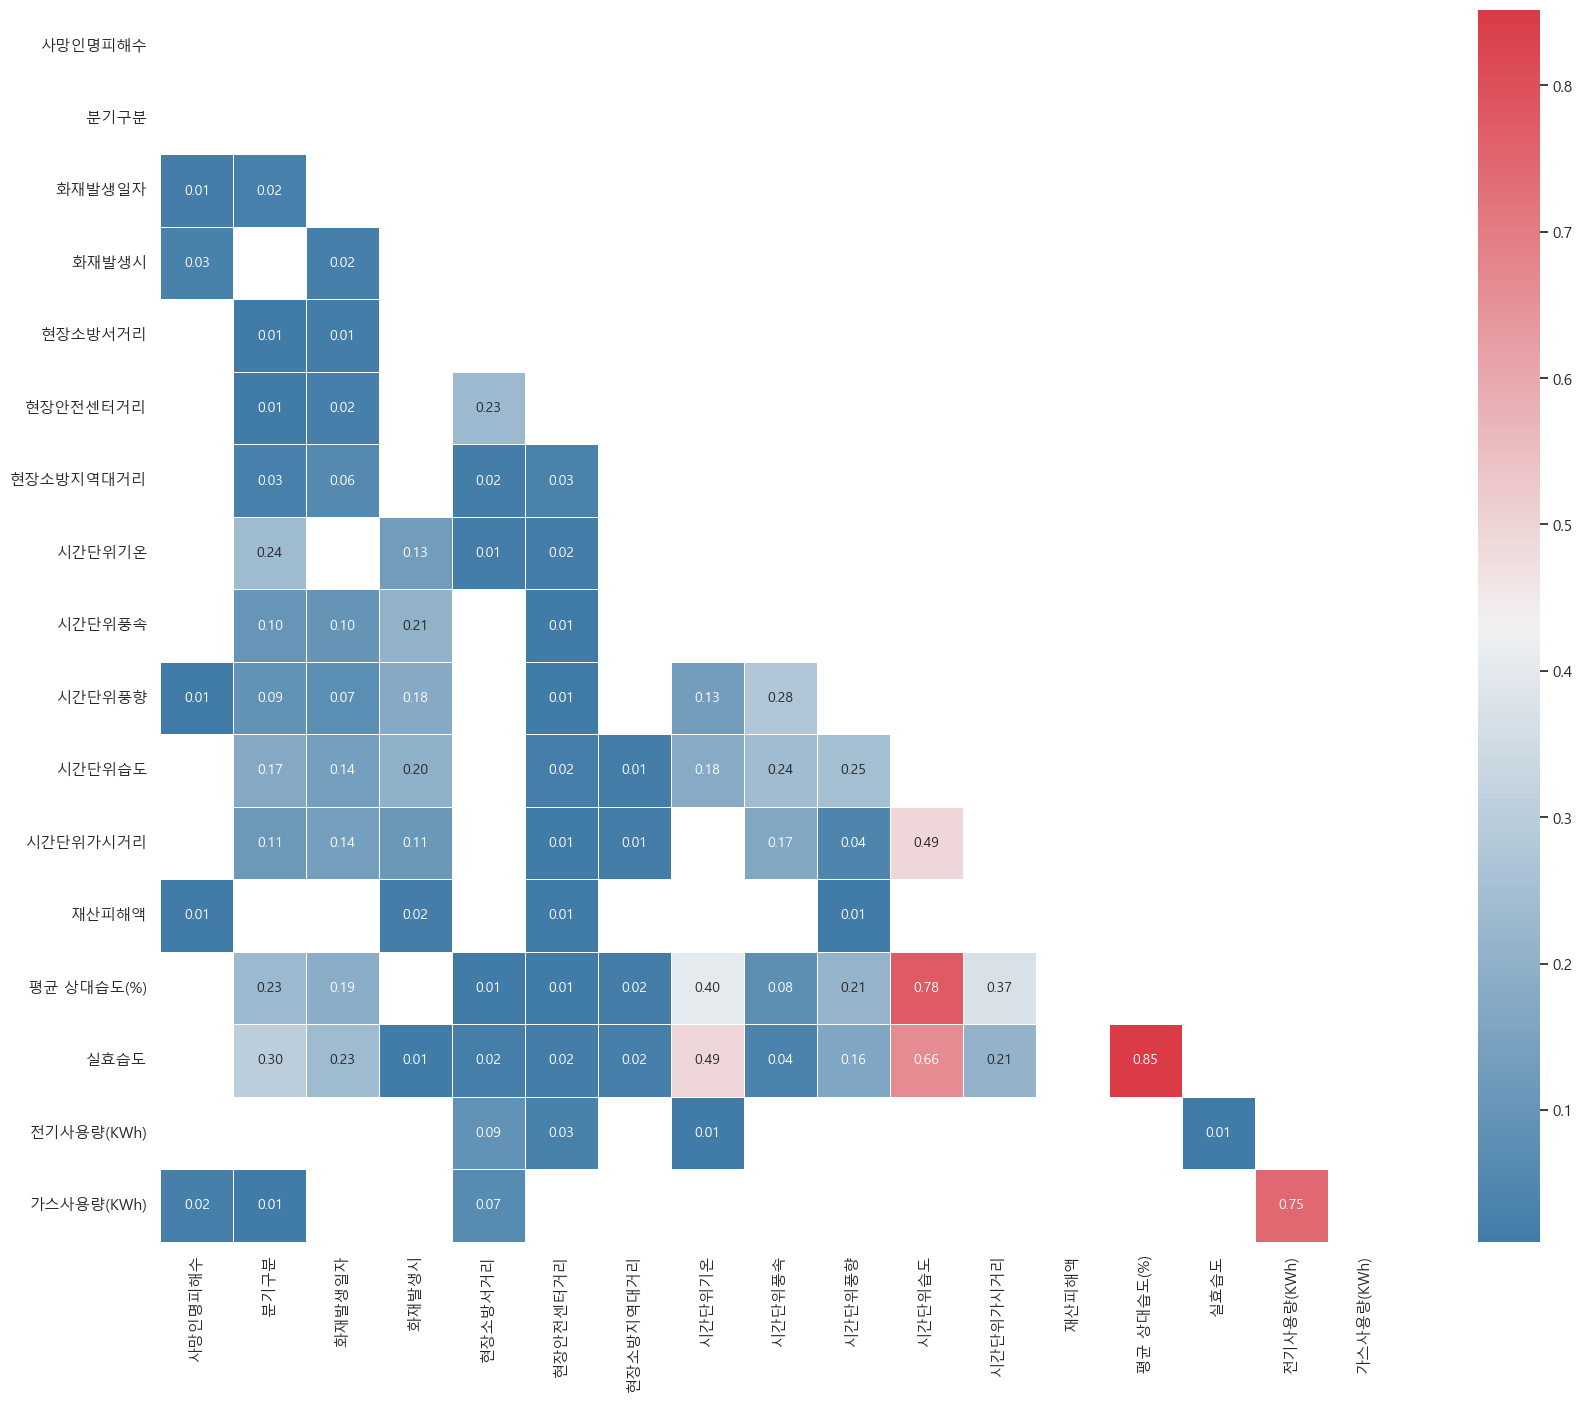

In [101]:
#상관관계가 0.01 이상인 변수들만
new_cor_matrix = cor_matrix[cor_matrix >= 0.01]
plt.figure(figsize=(20,16))
sns.heatmap(new_cor_matrix, annot=True, cmap=cmap, mask=mask,linewidths=.5,fmt='.2f', annot_kws ={'size' :10})

plt.show()

In [102]:
#df.to_csv('찐최종전처리완.csv', encoding="utf-8-sig", index=False)

In [103]:
df.shape

(21997, 21)

In [238]:
import pandas as pd
df = pd.read_csv("C:/Users/LG/Desktop/찐최종전처리완.csv")

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     21997 non-null  int64  
 1   분기구분        21997 non-null  int64  
 2   화재발생일자      21997 non-null  int64  
 3   화재발생시       21997 non-null  int64  
 4   현장소방서거리     21997 non-null  int64  
 5   현장안전센터거리    21997 non-null  int64  
 6   현장소방지역대거리   21997 non-null  float64
 7   발화요인대분류명    21997 non-null  object 
 8   시설장소중분류명    21997 non-null  object 
 9   방화관리대상여부    21997 non-null  object 
 10  시간단위기온      21997 non-null  float64
 11  시간단위풍속      21997 non-null  float64
 12  시간단위풍향      21997 non-null  float64
 13  시간단위습도      21997 non-null  float64
 14  시간단위가시거리    21997 non-null  int64  
 15  평균 상대습도(%)  21997 non-null  float64
 16  일시          21997 non-null  int64  
 17  실효습도        21997 non-null  float64
 18  주소          21997 non-null  object 
 19  전기사용량(KWh)  21997 non-nul

In [242]:
df.head()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,...,시설장소중분류명_종교시설,시설장소중분류명_지중시설,시설장소중분류명_창고시설,시설장소중분류명_청소년시설,시설장소중분류명_판매시설,시설장소중분류명_학교,시설장소중분류명_항공시설,시설장소중분류명_항만시설,방화관리대상여부_N,방화관리대상여부_Y
0,0,1,20170101,0,4,3,0.0,0.2,2.2,20.0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,20170107,15,4,2,0.0,9.3,1.9,270.0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,20170115,20,5,1,0.0,-4.2,1.8,250.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,20170120,10,4,1,0.0,-4.4,4.5,270.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,20170127,3,5,3,0.0,1.5,5.9,270.0,...,0,0,0,0,0,0,0,0,1,0


In [241]:
df = pd.get_dummies(df, columns = ['발화요인대분류명','시설장소중분류명','방화관리대상여부'])

In [234]:
new_df = df
new_df['사망인명피해수'] = np.log(df[df['사망인명피해수']>0]['사망인명피해수'])
new_df.head()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,...,시설장소중분류명_종교시설,시설장소중분류명_지중시설,시설장소중분류명_창고시설,시설장소중분류명_청소년시설,시설장소중분류명_판매시설,시설장소중분류명_학교,시설장소중분류명_항공시설,시설장소중분류명_항만시설,방화관리대상여부_N,방화관리대상여부_Y
0,NaN,1,20170101,0,4,3,0.0,0.2,2.2,20.0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,1,20170107,15,4,2,0.0,9.3,1.9,270.0,...,0,0,0,0,0,0,0,0,1,0
2,NaN,1,20170115,20,5,1,0.0,-4.2,1.8,250.0,...,0,0,0,0,0,0,0,0,1,0
3,NaN,1,20170120,10,4,1,0.0,-4.4,4.5,270.0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,1,20170127,3,5,3,0.0,1.5,5.9,270.0,...,0,0,0,0,0,0,0,0,1,0


In [235]:
new_df['사망인명피해수'].value_counts()

0.000000    779
0.693147    125
1.098612     47
1.386294     23
1.609438     11
1.791759      2
2.079442      2
2.302585      2
1.945910      1
2.708050      1
3.496508      1
2.197225      1
2.397895      1
3.465736      1
2.639057      1
2.890372      1
Name: 사망인명피해수, dtype: int64

In [236]:
# 종속변수 및 독립변수 데이터 셋으로 분리
y_target = df['사망인명피해수']
X_data = df.drop(['사망인명피해수','주소','화재발생일자'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15397, 65), (6600, 65), (15397,), (6600,))

In [30]:
import numpy as np
y_preds = tree.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_preds)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 0.46360974348328016
R^2: -0.19677938280792606


In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('talk')

In [116]:
#X = df[['사망인명피해수', '화재발생시', '현장소방서거리', '현장안전센터거리', '현장소방지역대거리', '시간단위기온', '시간단위풍속', '시간단위풍향', '시간단위습도', '시간단위가시거리', '재산피해액', '평균 상대습도(%)', '실효습도', '전기사용량(KWh)','가스사용량(KWh)']].values

In [392]:
df.head()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,평균 상대습도(%),실효습도,주소,전기사용량(KWh),가스사용량(KWh)
0,0,1,20170101,0,4,3,0.0,전기적 요인,단독주택,Y,...,2.2,20.0,79.0,491,13391,75.9,54.273750,강남구 논현동,19069.645904,16882.822424
1,0,1,20170107,15,4,2,0.0,부주의,일상서비스,N,...,1.9,270.0,51.0,703,35,64.9,49.554054,강남구 논현동,19069.645904,16882.822424
2,0,1,20170115,20,5,1,0.0,부주의,음식점,N,...,1.8,250.0,43.0,2000,308,35.3,31.607682,강남구 논현동,19069.645904,16882.822424
3,0,1,20170120,10,4,1,0.0,부주의,음식점,Y,...,4.5,270.0,75.0,558,184,70.3,50.355768,강남구 논현동,19069.645904,16882.822424
4,0,1,20170127,3,5,3,0.0,부주의,단독주택,N,...,5.9,270.0,82.0,634,877,47.3,43.742292,강남구 논현동,19069.645904,16882.822424


In [449]:
X = df[['사망인명피해수','재산피해액']].values

In [450]:
X

array([[    0, 13391],
       [    0,    35],
       [    0,   308],
       ...,
       [    0,    14],
       [    0, 38353],
       [    1,   462]], dtype=int64)

In [451]:
dbscan = DBSCAN(eps=5, min_samples=200).fit(X)

In [452]:
labels = dbscan.labels_
pd.Series(labels).value_counts()

 0    11739
-1     9377
 1      442
 2      312
 3      136
dtype: int64

In [453]:
labels

array([-1,  0,  2, ...,  0, -1, -1], dtype=int64)

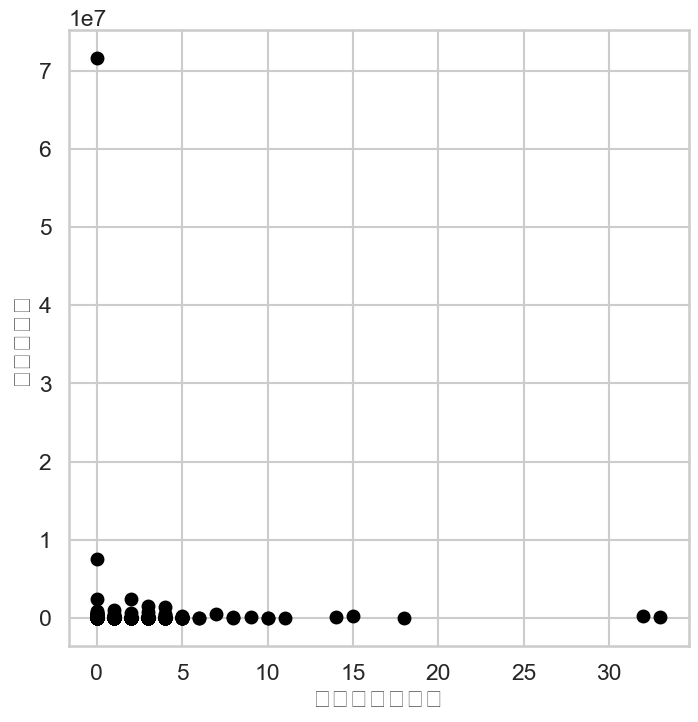

In [463]:
plt.figure(figsize=(8,8))

unique_labels = set(labels)
colors = ['#586fab', '#f55354','#5F9EA0','#A52A2A','#000000']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('사망인명피해수');
plt.ylabel('재산피해액');

데이터셋 내의 이상값은 [2397753, 2432471, 71613336, 7512359, 1586332]
